importing required modules

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

 Load the dataset into a Pandas DataFrame. 

In [113]:
df = pd.read_csv('heart.csv') 

# Use basic inspection techniques: 

 df.head() to view the first few rows. 

In [28]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


 df.describe() to get statistical summaries. 


In [5]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


df.info() to check for missing values and data types. 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


 Check the distribution of the target variable (Target). 


In [10]:
print(df['Age'].value_counts())

Age
58    19
57    17
54    16
59    14
52    13
51    12
60    12
62    11
56    11
44    11
41    10
64    10
63     9
67     9
53     8
61     8
43     8
45     8
55     8
65     8
42     8
46     7
66     7
48     7
50     7
49     5
47     5
70     4
39     4
68     4
35     4
40     3
69     3
71     3
37     2
34     2
38     2
29     1
77     1
74     1
76     1
Name: count, dtype: int64


# Task 2: Data Cleaning and Preprocessing
Handle Missing Data

Check for missing values (df.isnull().sum()).

In [11]:

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


If any columns have missing values, discuss strategies for handling them 
(e.g., filling with mean/median, or dropping rows). 

In [13]:
df['Chol'] = df['Chol'].fillna(df['Chol'].median())

df['Thal'] = df['Thal'].fillna(df['Thal'].mode()[0])

In [14]:
df['Chol']

0      233
1      286
2      229
3      250
4      204
      ... 
298    264
299    193
300    131
301    236
302    175
Name: Chol, Length: 303, dtype: int64

In [15]:
df['Thal'] 

0           fixed
1          normal
2      reversable
3          normal
4          normal
          ...    
298    reversable
299    reversable
300    reversable
301        normal
302        normal
Name: Thal, Length: 303, dtype: object

 Convert categorical variables like Sex, ChestPainType, RestingECG, etc., 
into numeric format using encoding (e.g., one-hot encoding or label 
encoding). 


In [ ]:


label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  
df['Fbs'] = label_encoder.fit_transform(df['Fbs'])  
df['ExAng'] = label_encoder.fit_transform(df['ExAng']) 

df = pd.get_dummies(df, columns=['ChestPain', 'RestECG', 'Thal'], drop_first=True)


In [30]:
df

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,RestECG_1,RestECG_2,Thal_normal,Thal_reversable
0,1,63,1,145,233,1,150,0,2.3,3,0.0,No,False,False,True,False,True,False,False
1,2,67,1,160,286,0,108,1,1.5,2,3.0,Yes,False,False,False,False,True,True,False
2,3,67,1,120,229,0,129,1,2.6,2,2.0,Yes,False,False,False,False,True,False,True
3,4,37,1,130,250,0,187,0,3.5,3,0.0,No,True,False,False,False,False,True,False
4,5,41,0,130,204,0,172,0,1.4,1,0.0,No,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,110,264,0,132,0,1.2,2,0.0,Yes,False,False,True,False,False,False,True
299,300,68,1,144,193,1,141,0,3.4,2,2.0,Yes,False,False,False,False,False,False,True
300,301,57,1,130,131,0,115,1,1.2,2,1.0,Yes,False,False,False,False,False,False,True
301,302,57,0,130,236,0,174,0,0.0,2,1.0,Yes,False,True,False,False,True,True,False


 Normalize or standardize numerical columns if necessary (e.g., 
RestingBP, Cholesterol, MaxHR). 


In [34]:
columns_to_scale = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df[columns_to_scale].head()

,Age,RestBP,Chol,MaxHR,Oldpeak
0,0.948726,0.757525,-0.264900,0.017197,1.087338
1,1.392002,1.611220,0.760415,-1.821905,0.397182
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147
3,-1.932564,-0.096170,0.063974,1.637359,2.122573
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912


In [35]:
df['ExerciseStress'] = df['Oldpeak'] * df['Slope']
print(df[['Oldpeak', 'Slope', 'ExerciseStress']].head())


    Oldpeak  Slope  ExerciseStress
0  1.087338      3        3.262014
1  0.397182      2        0.794363
2  1.346147      2        2.692293
3  2.122573      3        6.367718
4  0.310912      1        0.310912


#Task 3: Exploratory Data Analysis (EDA) 
  Univariate Analysis: 
   
Plot the distribution of key numerical features (e.g., Age, Cholesterol, 
MaxHR) using histograms or boxplots. 


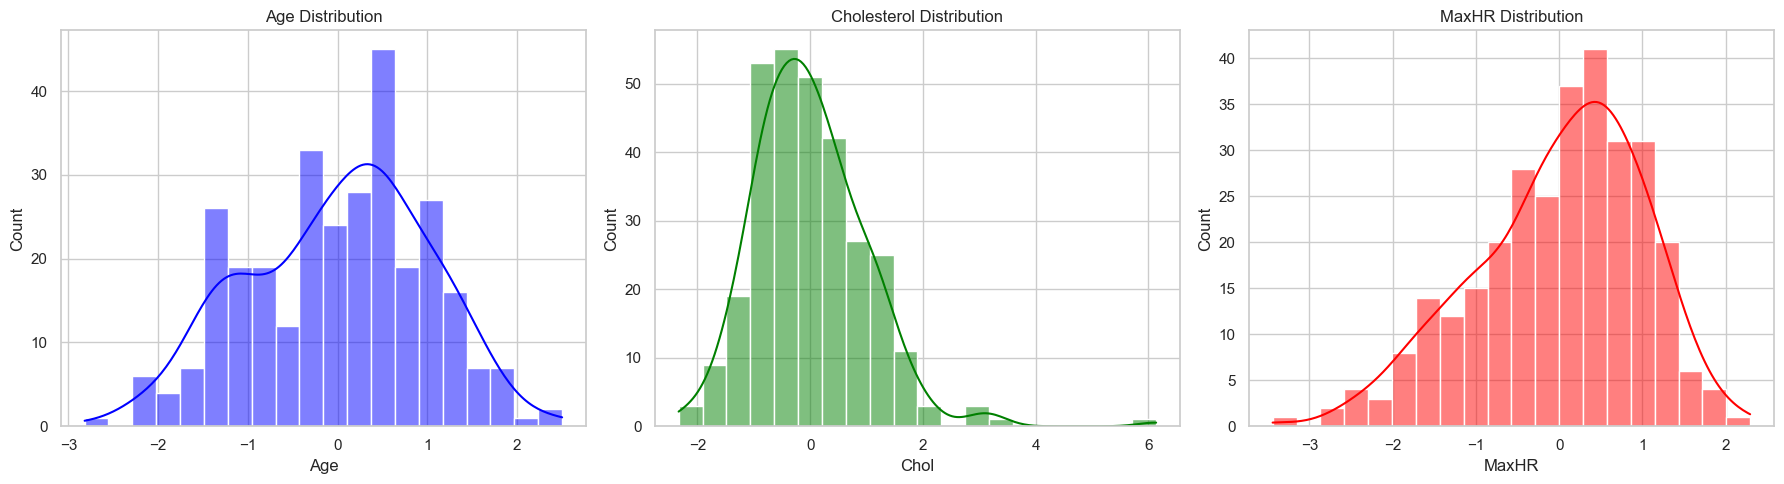

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Age Distribution')

sns.histplot(df['Chol'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Cholesterol Distribution')

sns.histplot(df['MaxHR'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title('MaxHR Distribution')

plt.tight_layout()



Visualize the distribution of the target variable (Target), using a count plot. 

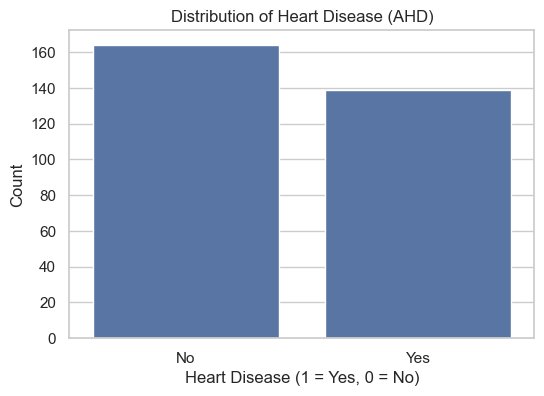

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='AHD')
plt.title('Distribution of Heart Disease (AHD)')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


Bivariate Analysis: 
o Explore the relationship between the target variable (Target) and other 
features: 

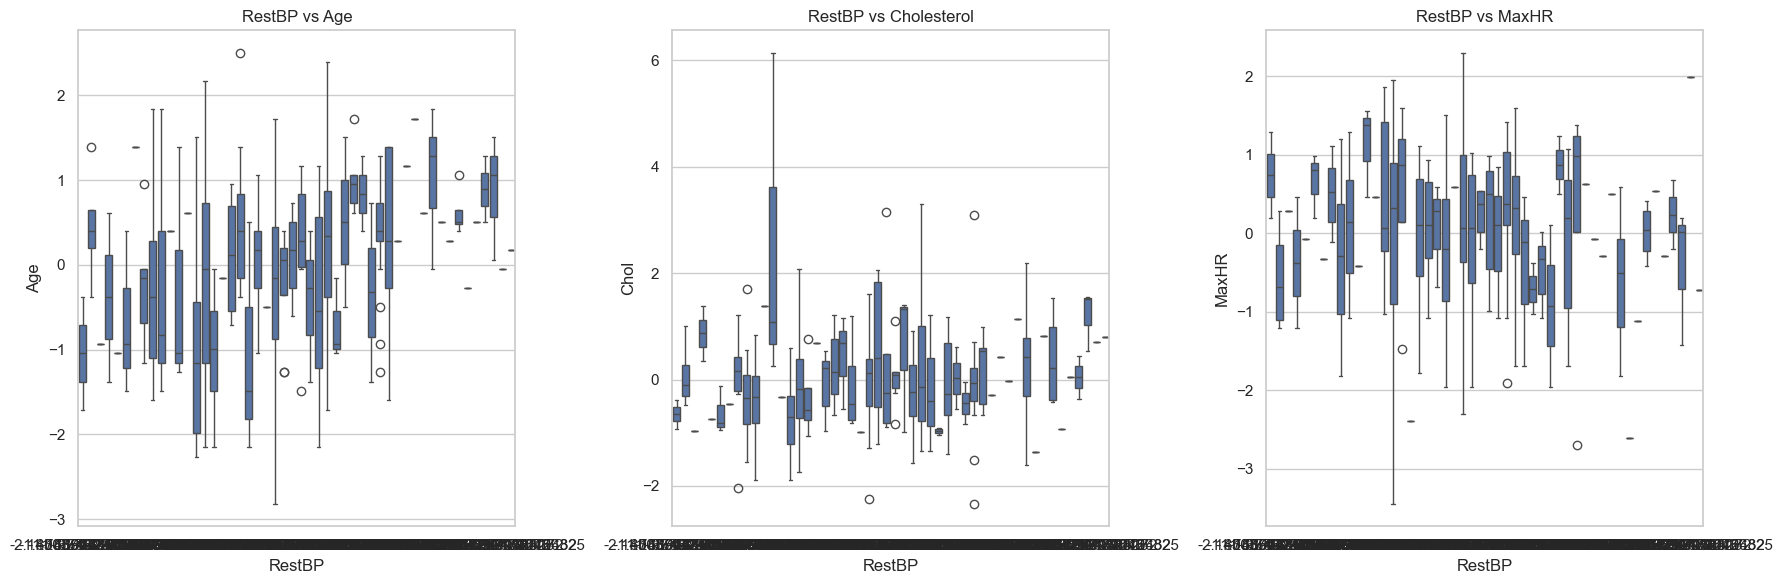

In [57]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for RestBP vs Age
sns.boxplot(data=df, x='RestBP', y='Age', ax=axes[0])
axes[0].set_title('RestBP vs Age')

# Boxplot for RestBP vs Cholesterol
sns.boxplot(data=df, x='RestBP', y='Chol', ax=axes[1])
axes[1].set_title('RestBP vs Cholesterol')

# Boxplot for RestBP vs MaxHR
sns.boxplot(data=df, x='RestBP', y='MaxHR', ax=axes[2])
axes[2].set_title('RestBP vs MaxHR')

plt.tight_layout()
plt.show()



 Correlation matrix to explore relationships between numeric 
features. 


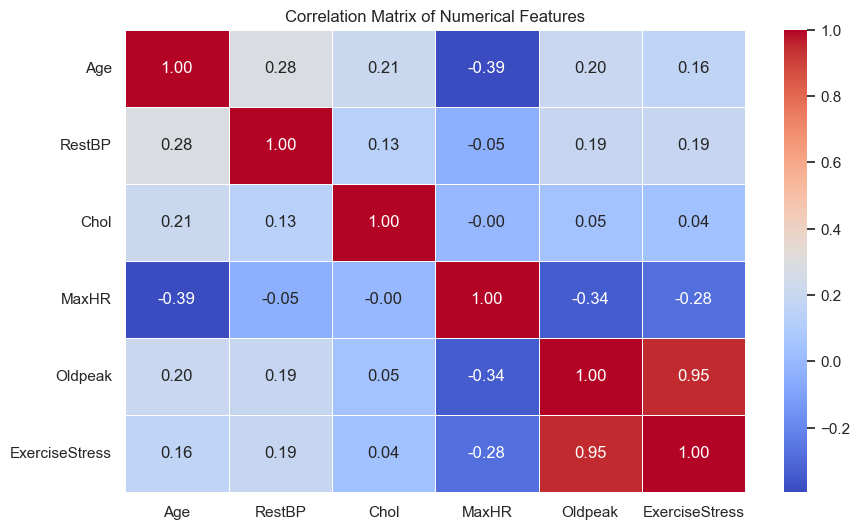

In [ ]:
correlation_matrix = df[['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'ExerciseStress']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


 Visualizing correlations: 
o Visualize correlations using a heatmap (sns.heatmap), focusing on 
relationships between features like cholesterol, age, and resting blood 
pressure. 


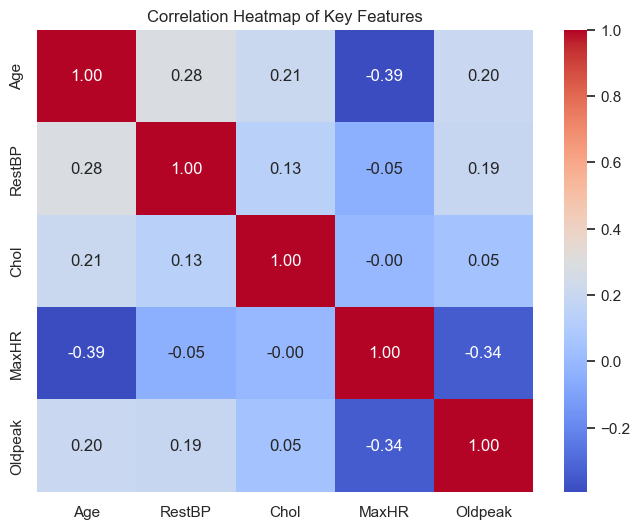

In [60]:
correlation_matrix = df[['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Key Features')
plt.show()


# Task 4: Aggregation and Insights
 Use groupby to find the survival rate (presence of heart disease) by diƯerent 
categories:

In [90]:
survival_by_gender = df.groupby('Sex')['AHD'].value_counts(normalize=True).unstack().apply(lambda x: x * 100, axis=1)
survival_by_gender = survival_by_gender.rename(columns={'No': 'No Heart Disease (%)', 'Yes': 'Heart Disease (%)'})
print("Survival by Gender:")
print(survival_by_gender)




Survival by Gender:
AHD  No Heart Disease (%)  Heart Disease (%)
Sex                                         
0               74.226804          25.773196
1               44.660194          55.339806



 Survival by chest pain type (ChestPainType). 

In [70]:
survival_by_chest_pain = df.groupby('ChestPain')['AHD'].value_counts(normalize=True).unstack().apply(lambda x: x * 100, axis=1)
survival_by_chest_pain = survival_by_chest_pain.rename(columns={'No': 'No Heart Disease (%)', 'Yes': 'Heart Disease (%)'})
print("\nSurvival by Chest Pain Type:")
print(survival_by_chest_pain)




Survival by Chest Pain Type:
AHD           No Heart Disease (%)  Heart Disease (%)
ChestPain                                            
asymptomatic             27.083333          72.916667
nonanginal               79.069767          20.930233
nontypical               82.000000          18.000000
typical                  69.565217          30.434783


Survival by maximum heart rate achieved (MaxHR). 

In [96]:
bins = [0, 100, 150, 200]
labels = ['Low MaxHR', 'Medium MaxHR', 'High MaxHR']
df['MaxHR_Category'] = pd.cut(df['MaxHR'], bins=bins, labels=labels)



In [86]:
survival_by_maxhr = df.groupby('MaxHR_Category', observed=False)['AHD'].value_counts(normalize=True).unstack().apply(lambda x: x * 100, axis=1)
survival_by_maxhr = survival_by_maxhr.rename(columns={'No': 'No Heart Disease (%)', 'Yes': 'Heart Disease (%)'})
print(survival_by_maxhr)

AHD             No Heart Disease (%)  Heart Disease (%)
MaxHR_Category                                         
Low MaxHR                  12.500000          87.500000
Medium MaxHR               33.587786          66.412214
High MaxHR                 72.392638          27.607362


 Calculate average cholesterol levels for people with and without heart disease, 
and compare these across categories (e.g., ChestPainType). 


In [88]:
#Average 
avg_chol_by_ahd = df.groupby('AHD')['Chol'].mean()
avg_chol_by_ahd



AHD
No     242.640244
Yes    251.474820
Name: Chol, dtype: float64

In [89]:
avg_chol_by_chestpain = df.groupby('ChestPain')['Chol'].mean()
avg_chol_by_chestpain

ChestPain
asymptomatic    250.513889
nonanginal      243.965116
nontypical      244.780000
typical         237.130435
Name: Chol, dtype: float64

# Task 5: Derive Medical Insights 
Investigate the data set and come up with at least 5 diƯerent insights with proof


Prepare a dashboard for your findings

In [125]:
average_age_by_ahd = df.groupby('AHD')['Age'].mean()
average_age_by_ahd


AHD
0    52.585366
1    56.625899
Name: Age, dtype: float64

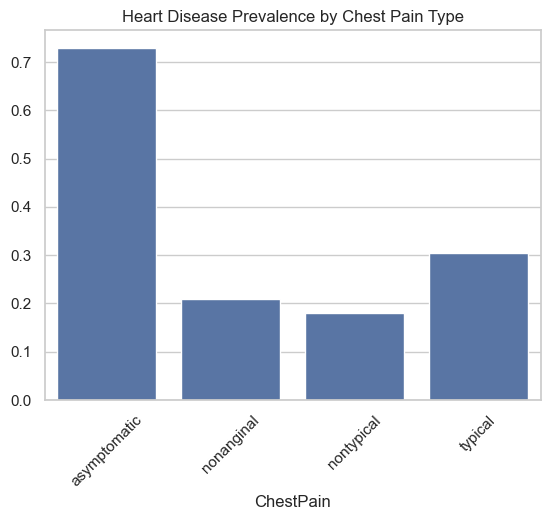

In [128]:
chest_pain_survival = df.groupby('ChestPain')['AHD'].mean()

sns.barplot(x=chest_pain_survival.index, y=chest_pain_survival.values)
plt.title('Heart Disease Prevalence by Chest Pain Type')
plt.xticks(rotation=45)
plt.show()

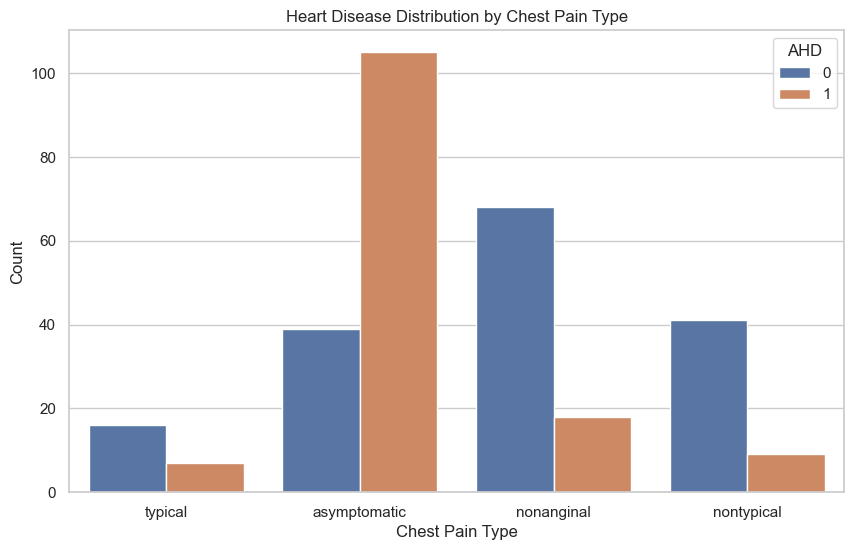

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='ChestPain', hue='AHD')
plt.title('Heart Disease Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


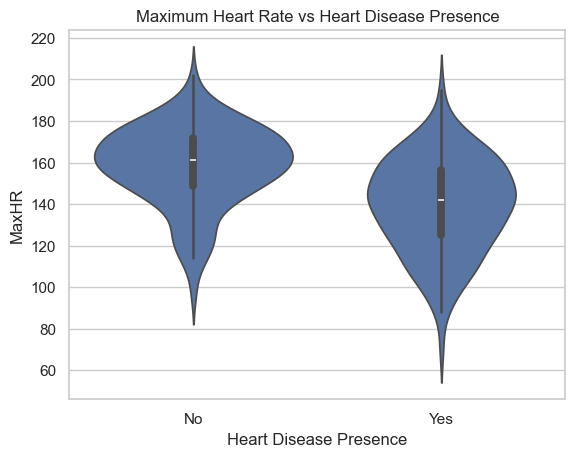

In [122]:
sns.violinplot(x='AHD', y='MaxHR', data=df)
plt.title('Maximum Heart Rate vs Heart Disease Presence')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Heart Disease Presence')
plt.show()

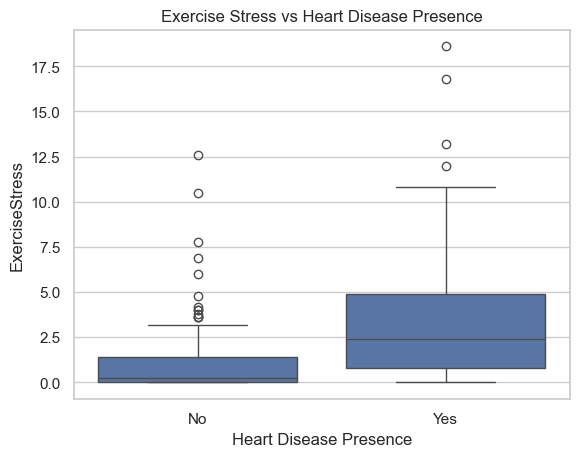

In [123]:
df['ExerciseStress'] = df['Oldpeak'] * df['Slope']
sns.boxplot(x='AHD', y='ExerciseStress', data=df)
plt.title('Exercise Stress vs Heart Disease Presence')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Heart Disease Presence')
plt.show()

In [127]:
average_age_by_ahd = df.groupby('AHD')['Age'].mean()
average_age_by_ahd


AHD
0    52.585366
1    56.625899
Name: Age, dtype: float64

In [126]:
bins = [df['MaxHR'].min() - 1, 100, 120, 140, 160, 180, df['MaxHR'].max() + 1]
labels = ['<100', '101-120', '121-140', '141-160', '161-180', '>180']
df['MaxHR_Bin'] = pd.cut(df['MaxHR'], bins=bins, labels=labels, right=False)
survival_by_maxhr = df.groupby('MaxHR_Bin',observed=False)['AHD'].value_counts(normalize=True) * 100
survival_by_maxhr

MaxHR_Bin  AHD
<100       1      87.500000
           0      12.500000
101-120    1      76.923077
           0      23.076923
121-140    1      66.666667
           0      33.333333
141-160    0      51.515152
           1      48.484848
161-180    0      72.727273
           1      27.272727
>180       0      85.000000
           1      15.000000
Name: proportion, dtype: float64